In [1]:
#####
##### Prework
#####

In [2]:
##### Import module

### Data
import numpy as np
import pandas as pd
import os
import glob
import datetime
import matplotlib.pyplot as plt
import datetime
import sys

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import decomposition

In [3]:
##### Path and load

path_train = './database/train.csv'
path_test  = './database/test.csv'
train_df   = pd.read_csv(path_train)
test_df    = pd.read_csv(path_test)

In [4]:
print(f'Length of train_df: {len(train_df)}')
train_df.head()

Length of train_df: 7111


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [5]:
print(f'Length of test_df: {len(test_df)}')
test_df.head()

Length of test_df: 2247


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [6]:
##### Feature engineering 1: feature abstract

### Air polution probably affected by:

# Weekend or not (Factories that exhausting gas don't work on weekend)
dayname_train = [int(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%w')) for x in list(train_df['date_time'])]
train_df['workday'] = [1 if (x == 0 or x == 6) else 0 for x in dayname_train]
dayname_test = [int(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%w')) for x in list(test_df['date_time'])]
test_df['workday'] = [1 if (x == 0 or x == 6) else 0 for x in dayname_test]

# Time of the day
train_df['num_hour'] = [int(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%H')) for x in list(train_df['date_time'])]
test_df['num_hour'] = [int(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%H')) for x in list(test_df['date_time'])]

In [7]:
##### Output csv file

new_order = ['date_time',
             'workday', 'num_hour',
             'deg_C', 'relative_humidity', 'absolute_humidity',
             'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
             'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

train_df = train_df[new_order]
test_df  = test_df[new_order[:-3]]

#train_df.to_csv('database/fe_train_2.csv')
#test_df.to_csv('database/fe_test_2.csv')

In [8]:
print(f'Length of train_df: {len(train_df)}')
#train_df.head()

Length of train_df: 7111


In [9]:
print(f'Length of test_df: {len(test_df)}')
#test_df.head()

Length of test_df: 2247


In [10]:
##### Feature engineering 2: check if strange data exist
### in order of months
# Case 1: deg_C abnormal rise / relative_humidity drop around 6700
# Case 2: deg_C abnormal rise / relative_humidity drop around 4050
# Case 3: Absolute humidity abnormal drop 
drop3_li = train_df[train_df['absolute_humidity'] < 0.25].index

In [11]:
### Determine dropout index list

drop_li = sorted(list(set(list(range(6695, 6770)) + list(range(4040, 4090)) + list(drop3_li))))
print(f'Number of dropped indices {len(drop_li)}')

train_df = train_df.drop(labels=drop_li).sort_index().reset_index(drop=True)

print(f'Length of train_df: {len(train_df)}')
#train_df.head()

Number of dropped indices 241
Length of train_df: 6870


In [12]:
# Looks like some sensor response to target air at about 7 in the morning

# Response of sensors are relative to concentration of targget air
# How to apply the hour trend...?

In [13]:
train_df = train_df.sort_index()
#train_df = train_df.drop('date_time', axis = 1)
train_df

,date_time,workday,num_hour,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,0,18,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,0,19,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,0,20,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,0,21,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,0,22,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,2010-12-31 20:00:00,0,20,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
6866,2010-12-31 21:00:00,0,21,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
6867,2010-12-31 22:00:00,0,22,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
6868,2010-12-31 23:00:00,0,23,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [14]:
##### Correlation between feature and targets

In [15]:
feature_li = ['workday', 'num_hour',
              'deg_C', 'relative_humidity', 'absolute_humidity',
              'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

target_li  = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

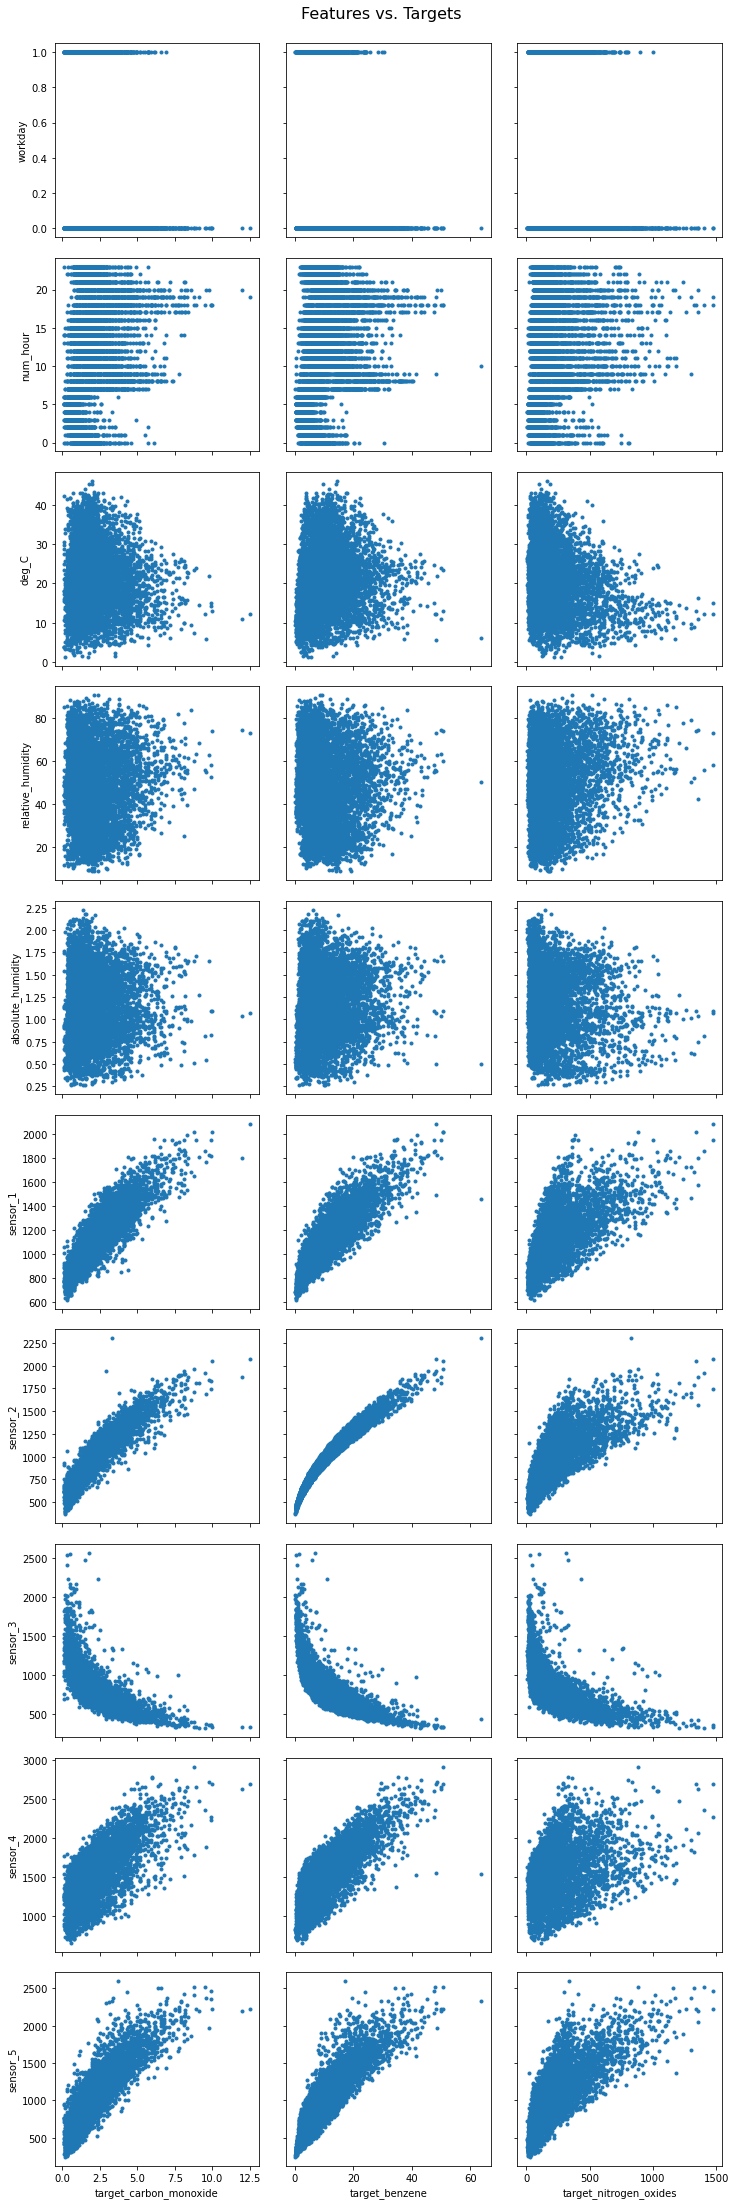

In [16]:
### Subplots 1: Features vs. targets

ax_x_name = 'Targets'
ax_y_name = 'Features'
ax_x_col = target_li
ax_y_col = feature_li

fig, ax = plt.subplots(len(ax_y_col), len(ax_x_col), sharex = 'col', sharey = 'row')
fig.suptitle(f'{ax_y_name} vs. {ax_x_name}', size=16)

fig.set_figheight(len(ax_y_col)*3+1)
fig.set_figwidth(len(ax_x_col)*3+1)
fig.tight_layout(rect=[0, 0, 1, 0.97])

for i in range(len(ax_y_col)):
    for j in range(len(ax_x_col)):
        ax[i, j].scatter(train_df[ax_x_col[j]], train_df[ax_y_col[i]], marker='.')
        #ax[i, j].set_title(f'{ax_y_col[i]} vs. {ax_x_col[j]}')

for i in range(len(ax_y_col)):
    plt.setp(ax[i, 0],  ylabel=ax_y_col[i])
for j in range(len(ax_x_col)):
    plt.setp(ax[-1, j], xlabel=ax_x_col[j])

plt.show()

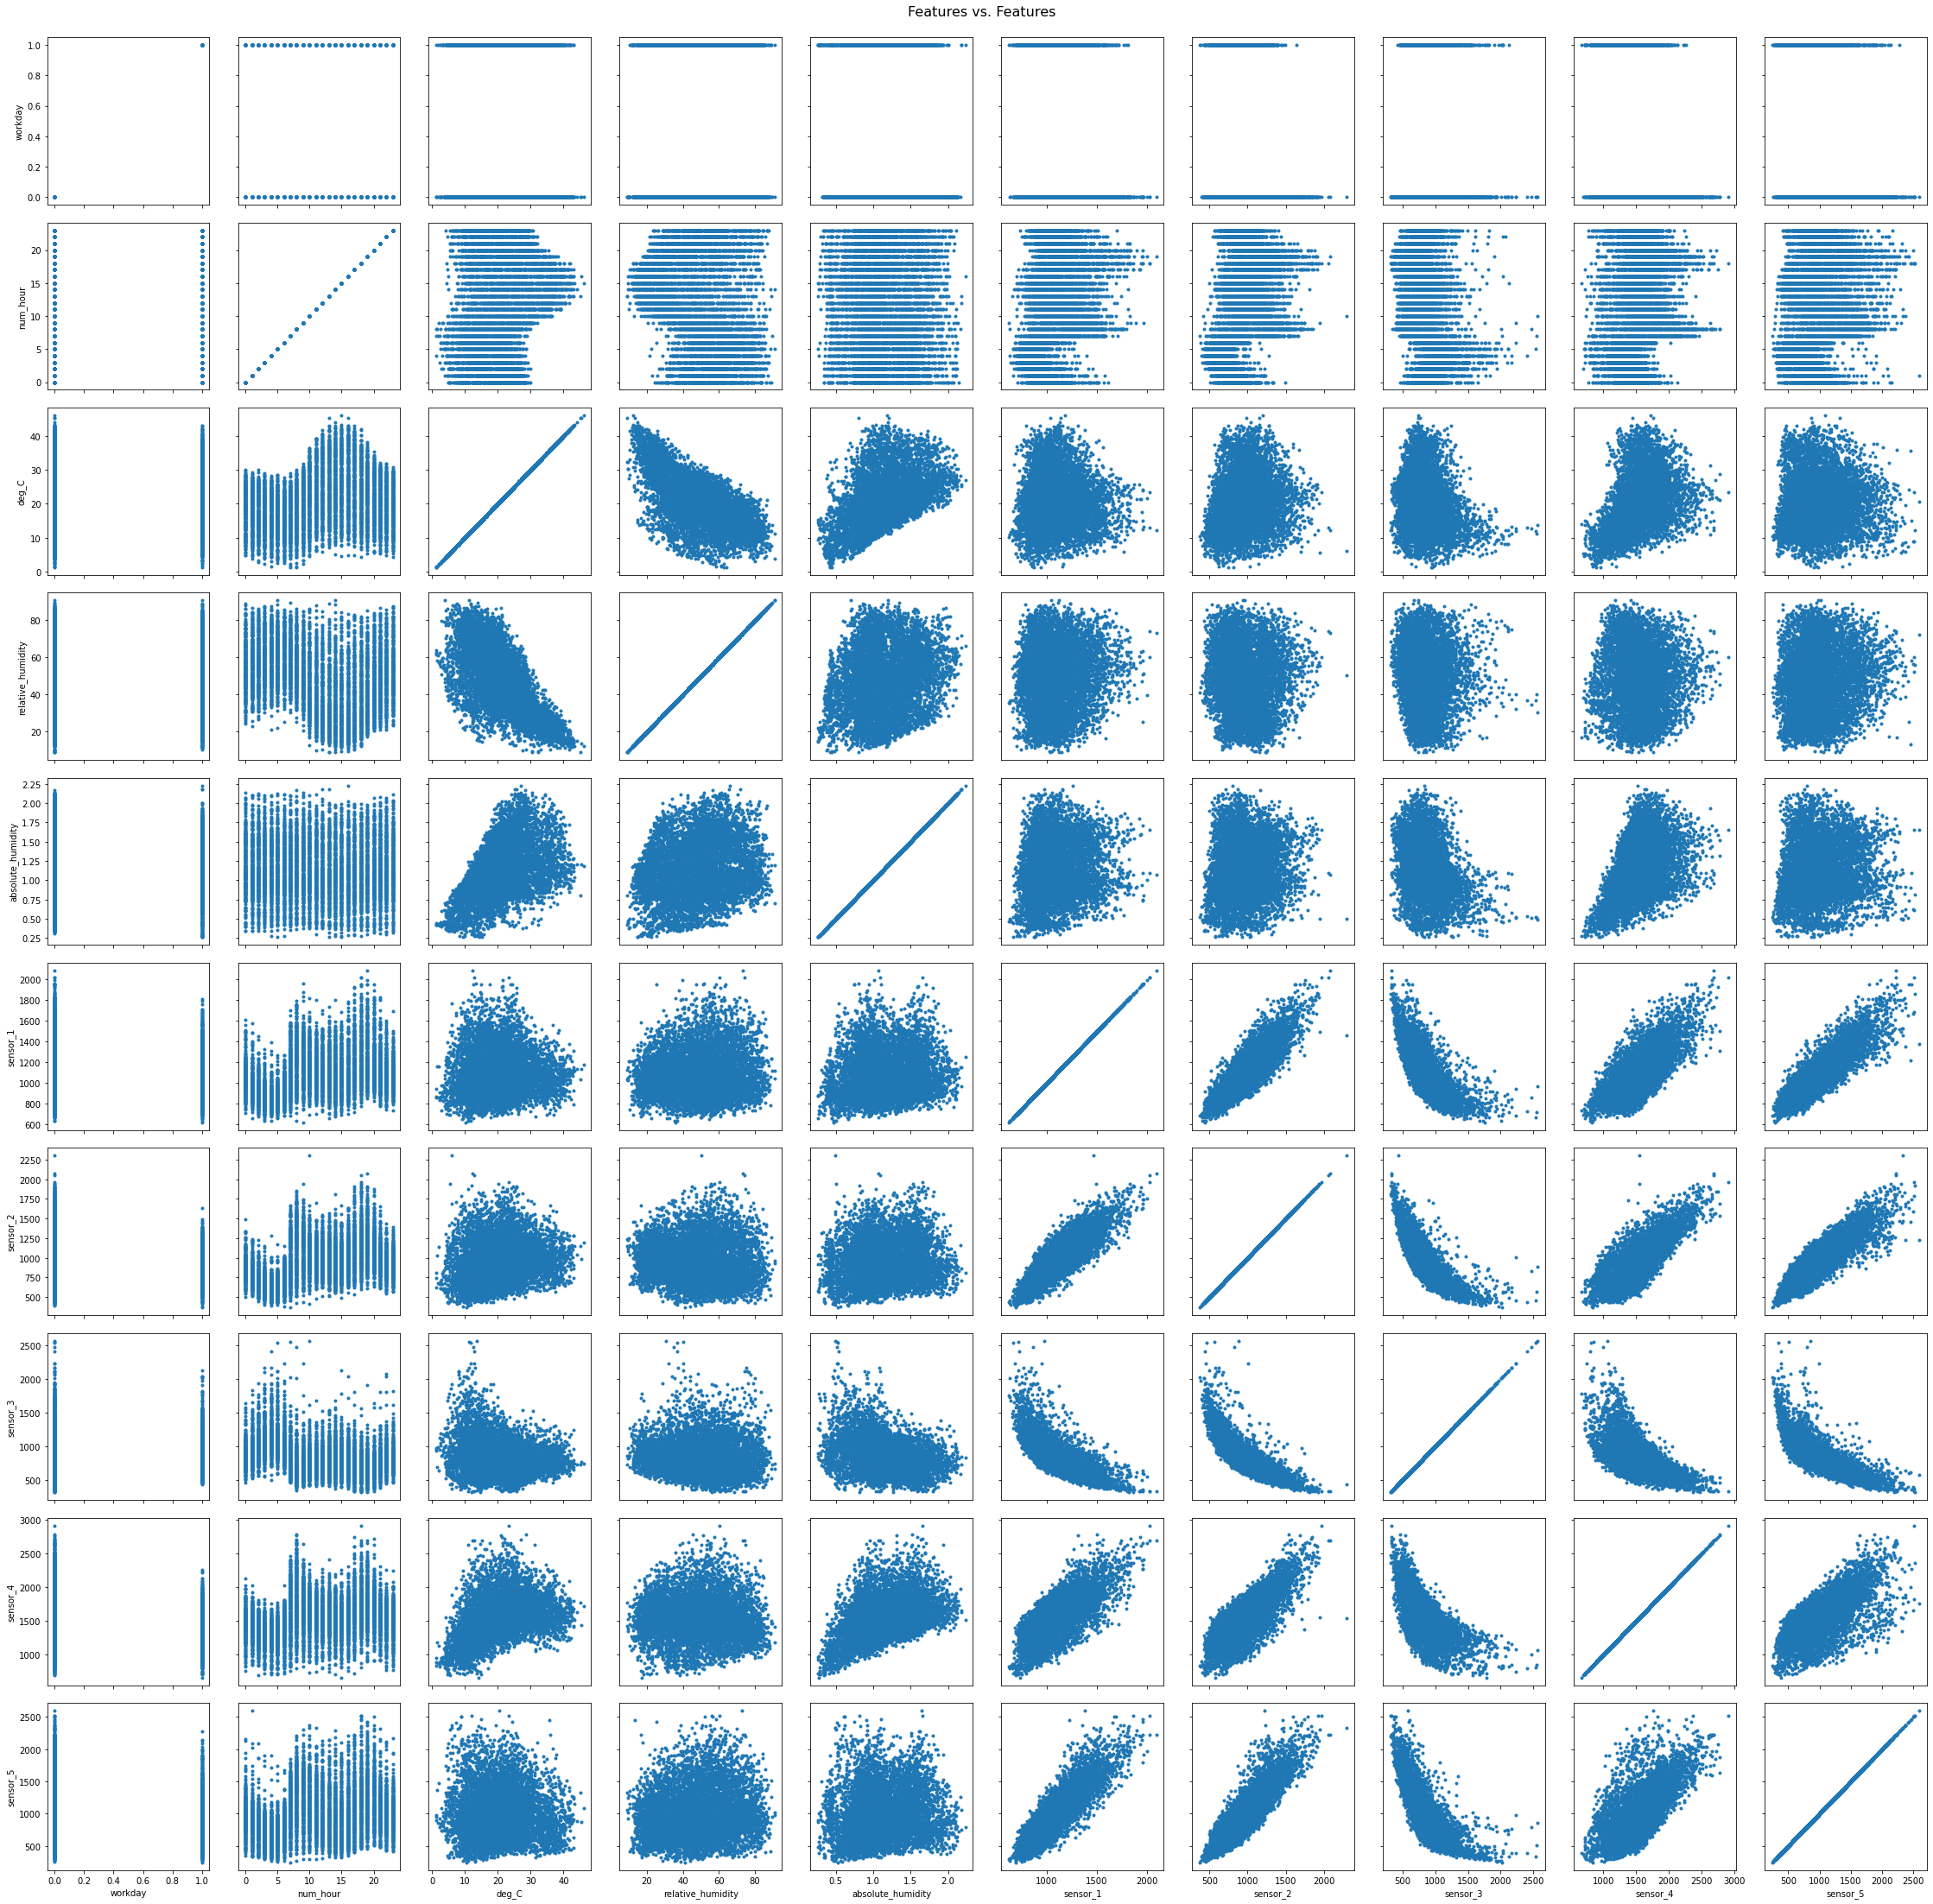

In [17]:
### Subplots 2: Features vs. features

ax_x_name = 'Features'
ax_y_name = 'Features'
ax_x_col = feature_li
ax_y_col = feature_li

fig, ax = plt.subplots(len(ax_y_col), len(ax_x_col), sharex = 'col', sharey = 'row')
fig.suptitle(f'{ax_y_name} vs. {ax_x_name}', size=16)

fig.set_figheight(len(ax_y_col)*3+1)
fig.set_figwidth(len(ax_x_col)*3+1)
fig.tight_layout(rect=[0, 0, 1, 0.97])

for i in range(len(ax_y_col)):
    for j in range(len(ax_x_col)):
        ax[i, j].scatter(train_df[ax_x_col[j]], train_df[ax_y_col[i]], marker='.')
        #ax[i, j].set_title(f'{ax_y_col[i]} vs. {ax_x_col[j]}')

for i in range(len(ax_y_col)):
    plt.setp(ax[i, 0],  ylabel=ax_y_col[i])
for j in range(len(ax_x_col)):
    plt.setp(ax[-1, j], xlabel=ax_x_col[j])

plt.show()

In [18]:
### Determine second dropout: useless col

drop_col = ['deg_C', 'relative_humidity', 'absolute_humidity']
train_df = train_df.drop(drop_col, axis=1).sort_index().reset_index(drop=True)
test_df  = test_df.drop(drop_col, axis=1).sort_index().reset_index(drop=True)

In [19]:
train_df

,date_time,workday,num_hour,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,0,18,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,0,19,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,0,20,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,0,21,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,0,22,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...
6865,2010-12-31 20:00:00,0,20,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
6866,2010-12-31 21:00:00,0,21,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
6867,2010-12-31 22:00:00,0,22,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
6868,2010-12-31 23:00:00,0,23,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [20]:
test_df

,date_time,workday,num_hour,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,1,0,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,1,1,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,1,2,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,1,3,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,1,4,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,0,10,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,0,11,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,0,12,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,0,13,1053.2,1009.0,702.0,1009.8,808.5


In [21]:
##### Try PCA: merge sensor 1245

In [22]:
merge_li = ['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']
PCA_axis_li = ['PCA_1', 'PCA_2']

In [23]:
pca = decomposition.PCA(n_components=2)
pca.fit(train_df[merge_li])
trans_mx = pca.transform(train_df[merge_li])

In [24]:
print(np.shape(trans_mx))
trans_mx

(6870, 2)


array([[ 449.77886155,   16.733684  ],
       [  -5.5068312 ,   93.64683098],
       [ 166.99280069,   43.8528971 ],
       ...,
       [-316.39826269,  622.38564579],
       [-340.72008398,  618.45635243],
       [-232.31605466,  698.04348524]])

In [25]:
train_df = train_df.drop(merge_li, axis=1)
train_df[PCA_axis_li[0]] = trans_mx[:, 0]
train_df[PCA_axis_li[1]] = trans_mx[:, 1]

In [26]:
trans_mx_test = pca.transform(test_df[merge_li])

In [27]:
print(np.shape(trans_mx_test))
trans_mx_test

(2247, 2)


array([[-232.31605466,  698.04348524],
       [ 206.87838335,  876.97024504],
       [-126.37471314,  662.17806647],
       ...,
       [ -11.02845035,  289.16038415],
       [-374.47132411,  329.33834766],
       [-286.95179322,  296.43322904]])

In [ ]:
test_df = test_df.drop(merge_li, axis=1)

In [29]:
test_df[PCA_axis_li[0]] = trans_mx_test[:, 0]
test_df[PCA_axis_li[1]] = trans_mx_test[:, 1]

In [30]:
train_df

,date_time,workday,num_hour,sensor_3,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,PCA_1,PCA_2
0,2010-03-10 18:00:00,0,18,1056.0,2.5,12.0,167.7,449.778862,16.733684
1,2010-03-10 19:00:00,0,19,1197.5,2.1,9.9,98.9,-5.506831,93.646831
2,2010-03-10 20:00:00,0,20,1060.2,2.2,9.2,127.1,166.992801,43.852897
3,2010-03-10 21:00:00,0,21,1102.9,2.2,9.7,177.2,234.874464,165.308497
4,2010-03-10 22:00:00,0,22,1180.9,1.5,6.4,121.8,38.659614,188.841099
...,...,...,...,...,...,...,...,...,...
6865,2010-12-31 20:00:00,0,20,873.0,1.3,5.1,191.1,-465.756572,464.812428
6866,2010-12-31 21:00:00,0,21,951.6,1.4,5.8,221.3,-470.103579,459.219421
6867,2010-12-31 22:00:00,0,22,861.9,1.6,5.2,227.4,-316.398263,622.385646
6868,2010-12-31 23:00:00,0,23,908.5,1.5,4.6,199.8,-340.720084,618.456352


In [31]:
test_df

,date_time,workday,num_hour,sensor_3,PCA_1,PCA_2
0,2011-01-01 00:00:00,1,0,797.1,-232.316055,698.043485
1,2011-01-01 01:00:00,1,1,687.9,206.878383,876.970245
2,2011-01-01 02:00:00,1,2,693.7,-126.374713,662.178066
3,2011-01-01 03:00:00,1,3,725.6,-74.043593,597.970319
4,2011-01-01 04:00:00,1,4,871.5,-265.926344,547.235186
...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,0,10,522.8,468.109078,521.934919
2243,2011-04-04 11:00:00,0,11,616.1,70.966398,419.130944
2244,2011-04-04 12:00:00,0,12,572.8,-11.028450,289.160384
2245,2011-04-04 13:00:00,0,13,702.0,-374.471324,329.338348


In [32]:
rest_feature_li = ['workday', 'num_hour', 'sensor_3', 'PCA_1', 'PCA_2']

In [33]:
scaler = MinMaxScaler()
train_feature_mx = train_df[rest_feature_li].to_numpy()
scaler.fit(train_feature_mx)
print(scaler.data_max_)

[1.00000000e+00 2.30000000e+01 2.56740000e+03 2.44200268e+03
 9.21929198e+02]


In [34]:
train_df[rest_feature_li] = scaler.transform(train_df[rest_feature_li])
test_df[rest_feature_li] = scaler.transform(test_df[rest_feature_li])

In [37]:
train_df = train_df[['date_time'] + rest_feature_li + target_li]
train_df

,date_time,workday,num_hour,sensor_3,PCA_1,PCA_2,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,0.0,0.782609,0.330291,0.461093,0.423545,2.5,12.0,167.7
1,2010-03-10 19:00:00,0.0,0.826087,0.392990,0.337935,0.472526,2.1,9.9,98.9
2,2010-03-10 20:00:00,0.0,0.869565,0.332152,0.384597,0.440816,2.2,9.2,127.1
3,2010-03-10 21:00:00,0.0,0.913043,0.351072,0.402960,0.518162,2.2,9.7,177.2
4,2010-03-10 22:00:00,0.0,0.956522,0.385635,0.349883,0.533148,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...
6865,2010-12-31 20:00:00,0.0,0.869565,0.249202,0.213435,0.708895,1.3,5.1,191.1
6866,2010-12-31 21:00:00,0.0,0.913043,0.284030,0.212259,0.705333,1.4,5.8,221.3
6867,2010-12-31 22:00:00,0.0,0.956522,0.244284,0.253837,0.809242,1.6,5.2,227.4
6868,2010-12-31 23:00:00,0.0,1.000000,0.264933,0.247258,0.806740,1.5,4.6,199.8


In [36]:
test_df

,date_time,workday,num_hour,sensor_3,PCA_1,PCA_2
0,2011-01-01 00:00:00,1.0,0.000000,0.215571,0.276582,0.857423
1,2011-01-01 01:00:00,1.0,0.043478,0.167184,0.395387,0.971369
2,2011-01-01 02:00:00,1.0,0.086957,0.169754,0.305240,0.834583
3,2011-01-01 03:00:00,1.0,0.130435,0.183889,0.319396,0.793694
4,2011-01-01 04:00:00,1.0,0.173913,0.248538,0.267490,0.761384
...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,0.0,0.434783,0.094027,0.466051,0.745272
2243,2011-04-04 11:00:00,0.0,0.478261,0.135369,0.358622,0.679804
2244,2011-04-04 12:00:00,0.0,0.521739,0.116182,0.336442,0.597035
2245,2011-04-04 13:00:00,0.0,0.565217,0.173431,0.238128,0.622621


In [38]:
train_df.to_csv('database/fe_train_DP-02.csv', index=False)
test_df.to_csv('database/fe_test_DP-02.csv', index=False)

In [ ]:
#####
#####
#####